# NUPAT AI Fellowship – Stage Two Case Study

## Part 1: Exploratory Data Analysis (EDA)

This section explores market dynamics and user behavior using trading and user activity data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully")


Libraries imported successfully


In [2]:
trades = pd.read_csv("trades.csv")
activity = pd.read_csv("user_activity.csv")

trades.shape, activity.shape


((2324, 6), (4845, 5))

In [3]:
trades.columns, activity.columns



(Index(['pair', 'amount', 'volume', 'side', 'timestamp', 'user_id'], dtype='object'),
 Index(['asset', 'amount', 'activity_type', 'timestamp', 'user_id'], dtype='object'))

In [4]:
trades.head()



,pair,amount,volume,side,timestamp,user_id
0,AAVENGN,500.26,0.001222,buy,2024-12-03T01:42:07.072672Z,541-1561-1521-1561-148
1,ADANGN,889.20,0.500000,sell,2024-12-02T11:29:56.860014Z,491-1541-1521-1571-156
2,ADANGN,30653.12,17.100000,sell,2024-11-30T05:25:49.99166Z,1021-1481-1521-1561-1100
3,ADANGN,1978.36,1.100000,sell,2024-12-07T07:41:02.191598Z,981-1571-1521-1971-151
4,ADANGN,2913.62,1.600000,sell,2024-12-07T21:16:11.791118Z,981-1571-1521-1971-151


In [5]:
activity.head()



,asset,amount,activity_type,timestamp,user_id
0,NGN,131062.0,withdrawal,2025-01-17T14:37:56.806446Z,561-1561-1521-1981-1101
1,NGN,50000.0,withdrawal,2025-01-17T14:37:56.818033Z,971-11001-1521-1571-1101
2,NGN,131062.0,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100
3,NGN,20064.0,withdrawal,2025-01-17T17:05:18.201218Z,531-11001-1521-1571-198
4,NGN,2000.0,withdrawal,2025-01-17T14:38:22.555744Z,501-11021-1521-1561-154


In [6]:
trades["timestamp"] = pd.to_datetime(trades["timestamp"])
activity["timestamp"] = pd.to_datetime(activity["timestamp"])

print("Timestamp conversion completed")


Timestamp conversion completed


### Market Dynamics: Top 3 Most Traded Pairs by USD Volume

The `amount` column represents the total trade value in the quote currency of each trading pair.
To compute USD trading volume, trade amounts were converted to USD using a fixed exchange
rate of 1500 local units per USD.


In [12]:
USD_RATE = 1500

trades["trade_value_usd"] = trades["amount"] / USD_RATE


In [13]:
top_3_pairs = (
    trades.groupby("pair")["trade_value_usd"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

top_3_pairs


pair
BTCNGN     136215.488680
USDTNGN     59180.573580
ETHNGN       9764.589513
Name: trade_value_usd, dtype: float64

### Volatility Analysis: 7-Day Rolling Price Volatility for BTCNGN

This analysis measures daily price volatility for the BTCNGN trading pair using a 7-day rolling
standard deviation.


In [15]:
btc_trades = trades[trades["pair"] == "BTCNGN"]


In [17]:
btc_daily_volume = (
    btc_trades
    .set_index("timestamp")
    .resample("D")["amount"]
    .mean()
)


In [18]:
btc_volatility = btc_daily_volume.rolling(window=7).std()


### User Behavior: Peak Deposit Times

This analysis identifies the days of the week and hours of the day when user deposits are highest.


In [21]:
deposits = activity[activity["activity_type"] == "deposit"].copy()

In [22]:
deposits["hour"] = deposits["timestamp"].dt.hour
deposits["day_of_week"] = deposits["timestamp"].dt.day_name()


In [23]:
hourly_deposits = deposits.groupby("hour")["amount"].sum()
daily_deposits = deposits.groupby("day_of_week")["amount"].sum()


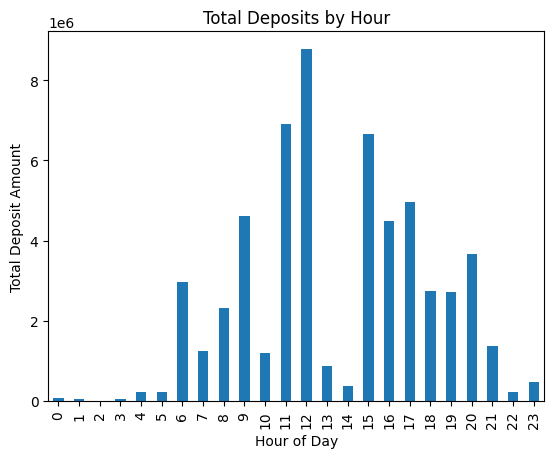

In [24]:
hourly_deposits.plot(kind="bar", title="Total Deposits by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Deposit Amount")
plt.show()


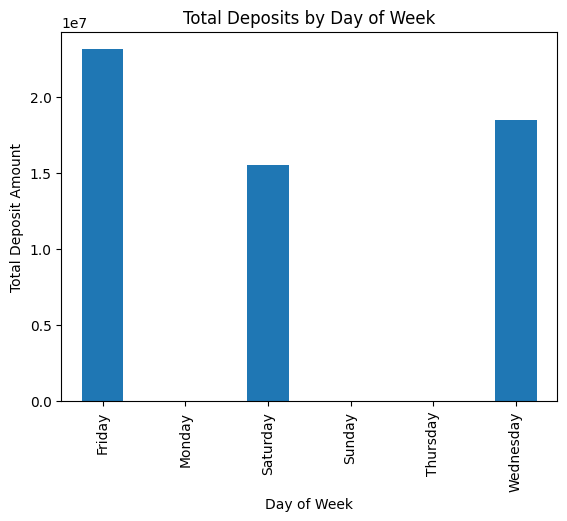

In [25]:
daily_deposits.plot(kind="bar", title="Total Deposits by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Deposit Amount")
plt.show()
